# Density transects

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36803,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:45103,Total threads: 4
Dashboard: http://127.0.0.1:45089/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:44861,


In [50]:
xloc = -100
h = cc.querying.getvar('panant-hycom1', 'h', session, chunks={'xh':60,'yh':60}).isel(time=-1).sel(xh=xloc,method='nearest').load()
u = cc.querying.getvar('panant-hycom1', 'u', session, chunks={'xq':60,'yh':60}).isel(time=-1).sel(xq=xloc,method='nearest').load()

# Based on Ashley's fix_zcoord function
# Technically, this is half a gridpoint off ...
depth = h.cumsum(dim='zl').values
new_u = xr.DataArray(
        data=u.values,
        dims=["zl", "yh"],
        coords=dict(
            yh=(["yh"], u.yh.values),
            depth=(["zl", "yh"], depth),
        ),
        attrs= u.attrs
    )

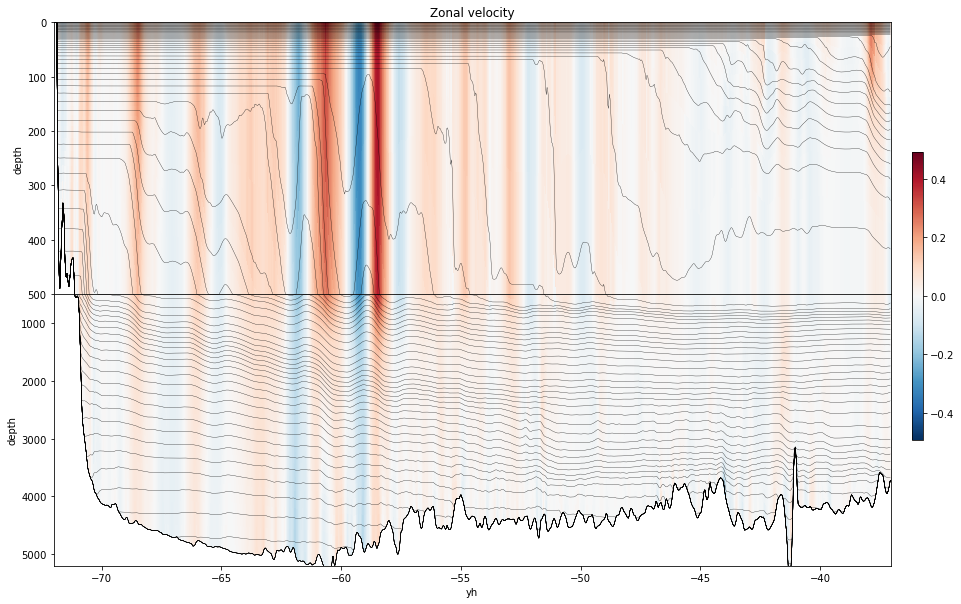

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(211)
p1 = new_u.plot(y = "depth",add_colorbar=False)
for ii in range(75):
    plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.3)
plt.ylim([0,500])
plt.xlim(xmin=-72)
plt.gca().invert_yaxis()
plt.title('Zonal velocity, %d °E'%xloc)

plt.subplot(212)
new_u.plot(y = "depth",add_colorbar=False)
for ii in range(75):
    plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.3)
plt.ylim([500,5200])
plt.xlim(xmin=-72)
plt.gca().invert_yaxis()

plt.subplots_adjust(hspace=0)

ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(p1,ax_c)

In [52]:
xloc = -160
h = cc.querying.getvar('panant-hycom1', 'h', session, chunks={'xh':60,'yh':60}).isel(time=-1).sel(xh=xloc,method='nearest').load()
u = cc.querying.getvar('panant-hycom1', 'u', session, chunks={'xq':60,'yh':60}).isel(time=-1).sel(xq=xloc,method='nearest').load()

# Based on Ashley's fix_zcoord function
depth = h.cumsum(dim='zl').values
new_u = xr.DataArray(
        data=u.values,
        dims=["zl", "yh"],
        coords=dict(
            yh=(["yh"], u.yh.values),
            depth=(["zl", "yh"], depth),
        ),
        attrs= u.attrs
    )

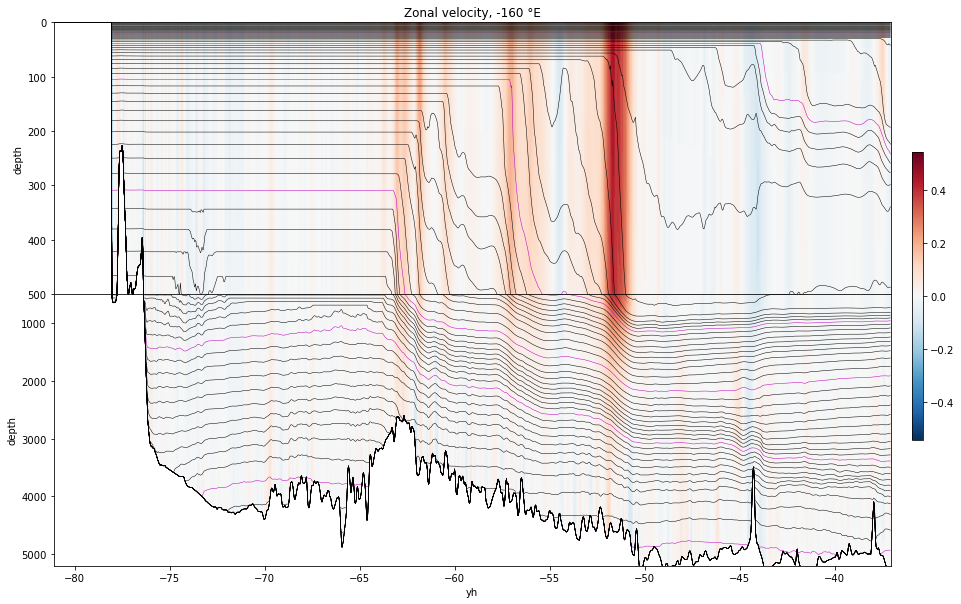

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(211)
p1 = new_u.plot(y = "depth",add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(u.yh.values,depth[ii,:],'m',linewidth=0.5)
    else:
        plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.5)
plt.ylim([0,500])
#plt.xlim(xmin=-75)
plt.gca().invert_yaxis()
plt.title('Zonal velocity, %d °E'%xloc)

plt.subplot(212)
new_u.plot(y = "depth",add_colorbar=False)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(u.yh.values,depth[ii,:],'m',linewidth=0.5)
    else:
        plt.plot(u.yh.values,depth[ii,:],'k',linewidth=0.5)
        
plt.ylim([500,5200])
#plt.xlim(xmin=-75)
plt.gca().invert_yaxis()

plt.subplots_adjust(hspace=0)

ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(p1,ax_c)

---

In [4]:
rhopot2 = cc.querying.getvar('panant-v2', 'rhopot2', session, chunks={'xh':60}).isel(time=0)
rhopot2

<xarray.DataArray 'rhopot2' (z_l: 75, yh: 1690, xh: 7200)>
dask.array<getitem, shape=(75, 1690, 7200), dtype=float32, chunksize=(75, 1690, 60), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -280.0 -279.9 -279.9 -279.8 ... 79.87 79.92 79.97
  * yh       (yh) float64 -81.1 -81.08 -81.06 -81.03 ... -37.16 -37.12 -37.08
  * z_l      (z_l) float64 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
    time     object 1993-10-16 12:00:00
Attributes:
    units:          kg m-3
    long_name:      Potential density referenced to 2000 dbar
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    time_bnds:      <xarray.DataArray 'time_bnds' (time: 6, nv: 2)>\ndask.arr...

In [49]:
rhopot2_min = rhopot2.min(dim={'xh','yh'}).load()
rhopot2_min

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/distributed/worker.py:3851: RuntimeWarning: All-NaN slice encountered
  result = function(*args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/utils.py:35: Runtime

<xarray.DataArray 'rhopot2' (z_l: 75)>
array([1025.3369, 1025.3523, 1025.4417, 1025.9247, 1026.5386, 1027.4084,
       1028.2153, 1028.4303, 1028.6917, 1029.135 , 1029.8118, 1030.8401,
       1031.9354, 1032.8127, 1033.1908, 1033.5007, 1033.5061, 1033.5131,
       1033.5234, 1033.539 , 1033.5632, 1033.6019, 1033.6716, 1033.7827,
       1033.9094, 1034.0448, 1034.1729, 1034.2957, 1034.3406, 1034.384 ,
       1034.4451, 1034.5083, 1034.5679, 1034.6052, 1034.6448, 1034.7302,
       1034.8427, 1034.9786, 1035.105 , 1035.2019, 1035.2719, 1035.33  ,
       1035.3832, 1035.4467, 1035.5138, 1035.6364, 1035.918 , 1036.0004,
       1036.3081, 1036.409 , 1036.4933, 1036.5582, 1036.6288, 1036.7142,
       1036.7876, 1036.8253, 1036.855 , 1036.8835, 1036.9121, 1036.9421,
       1036.9733, 1036.9854, 1036.9856, 1036.9873, 1036.9873, 1036.9977,
       1036.9979, 1036.998 , 1036.9982, 1037.0006, 1037.0676, 1037.0687,
       1037.0687, 1037.093 , 1037.1146], dtype=float32)
Coordinates:
  * z_l      (z_l) float64 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
    time     object 1993-10-16 12:00:00

In [50]:
rhopot2_max = rhopot2.max(dim={'xh','yh'}).load()
rhopot2_max

<xarray.DataArray 'rhopot2' (z_l: 75)>
array([1039.3164, 1039.3226, 1039.335 , 1039.3518, 1039.3746, 1039.4055,
       1039.4354, 1039.4419, 1039.4219, 1039.3854, 1038.7487, 1038.6919,
       1038.6936, 1038.7893, 1038.868 , 1038.9692, 1039.046 , 1039.0598,
       1037.9338, 1037.822 , 1037.9628, 1038.0879, 1037.886 , 1037.7963,
       1037.7786, 1037.8802, 1037.8408, 1037.7545, 1037.8127, 1037.8478,
       1037.7351, 1037.7612, 1037.7699, 1037.7618, 1037.7313, 1037.6893,
       1037.6919, 1037.6919, 1037.6844, 1037.6783, 1037.6803, 1037.6821,
       1037.6841, 1037.686 , 1037.6693, 1037.6516, 1037.6378, 1037.6381,
       1037.6265, 1037.3119, 1037.3152, 1037.3208, 1037.3281, 1037.3242,
       1037.3057, 1037.3029, 1037.3008, 1037.2922, 1037.2819, 1037.2728,
       1037.2522, 1037.2463, 1037.2378, 1037.2334, 1037.2306, 1037.2281,
       1037.2288, 1037.2256, 1037.224 , 1037.2223, 1037.2212, 1037.2195,
       1037.2191, 1037.2177, 1037.2173], dtype=float32)
Coordinates:
  * z_l      (z_l) float64 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
    time     object 1993-10-16 12:00:00

In [51]:
rhopot2_median = rhopot2.median(dim={'xh','yh'}).load()
rhopot2_median

<xarray.DataArray 'rhopot2' (z_l: 75)>
array([1036.4404, 1036.4413, 1036.4421, 1036.4429, 1036.4437, 1036.4443,
       1036.445 , 1036.4456, 1036.4462, 1036.4468, 1036.4474, 1036.448 ,
       1036.4489, 1036.45  , 1036.4513, 1036.4529, 1036.455 , 1036.4578,
       1036.4612, 1036.4657, 1036.4719, 1036.4802, 1036.4899, 1036.5017,
       1036.5145, 1036.5278, 1036.5431, 1036.5593, 1036.5779, 1036.594 ,
       1036.6101, 1036.6305, 1036.6543, 1036.6797, 1036.706 , 1036.7318,
       1036.7561, 1036.7773, 1036.7957, 1036.8136, 1036.8317, 1036.8499,
       1036.8682, 1036.8859, 1036.9027, 1036.9194, 1036.9371, 1036.9569,
       1036.9789, 1037.0028, 1037.0267, 1037.0482, 1037.0657, 1037.0795,
       1037.091 , 1037.1007, 1037.1093, 1037.1171, 1037.1241, 1037.1306,
       1037.1362, 1037.1414, 1037.146 , 1037.1497, 1037.1527, 1037.1555,
       1037.1582, 1037.159 , 1037.1587, 1037.1586, 1037.1597, 1037.1599,
       1037.1609, 1037.1584, 1037.1582], dtype=float32)
Coordinates:
  * z_l      (z_l) float64 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
    time     object 1993-10-16 12:00:00

In [52]:
kds75 = xr.open_dataset('/g/data/x77/amh157/hycom1_kds75.nc')
rholevels = kds75.sigma2.isel(interfaces = slice(1,76)).load()
rholevels

<xarray.DataArray 'sigma2' (interfaces: 75)>
array([1014.3034, 1017.8088, 1020.843 , 1023.5566, 1025.813 , 1027.0275,
       1027.9114, 1028.6422, 1029.2795, 1029.852 , 1030.3762, 1030.8626,
       1031.3183, 1031.7486, 1032.1572, 1032.5471, 1032.9207, 1033.2798,
       1033.6261, 1033.9608, 1034.2519, 1034.4817, 1034.6774, 1034.8508,
       1035.0082, 1035.1533, 1035.2886, 1035.4159, 1035.5364, 1035.6511,
       1035.7608, 1035.8661, 1035.9675, 1036.0645, 1036.1554, 1036.2411,
       1036.3223, 1036.3998, 1036.4739, 1036.5451, 1036.6137, 1036.68  ,
       1036.7441, 1036.8062, 1036.8526, 1036.8874, 1036.9164, 1036.9418,
       1036.9647, 1036.9857, 1037.0052, 1037.0236, 1037.0409, 1037.0574,
       1037.0738, 1037.0902, 1037.1066, 1037.123 , 1037.1394, 1037.1558,
       1037.1722, 1037.1887, 1037.206 , 1037.2241, 1037.2435, 1037.2642,
       1037.2866, 1037.3112, 1037.3389, 1037.3713, 1037.4118, 1037.475 ,
       1037.6332, 1037.8104, 1038.    ])
Dimensions without coordinates: interfaces
Attributes:
    long_name:  Interface target potential density referenced to 2000 dbars
    units:      kg/m3

In [56]:
rhonew = rholevels.values + 0.15*np.sin(np.pi*rhopot2.z_l.values/4500)

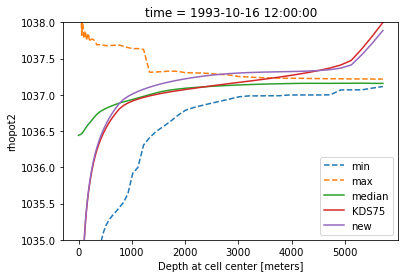

In [57]:
rhopot2_min.plot(linestyle='--',label='min')
rhopot2_max.plot(linestyle='--',label='max')
rhopot2_median.plot(label='median')
plt.plot(rhopot2.z_l,rholevels,label='KDS75')
plt.plot(rhopot2.z_l,rhonew,label='new')
plt.ylim([1035,1038])
plt.legend()

In [58]:
yy,rho_coord = np.meshgrid(rhopot2.yh.values,rholevels.values)
rho_coord.shape
yy,rho_coord_new = np.meshgrid(rhopot2.yh.values,rhonew)

In [59]:
temprho = rhopot2.sel(xh=-200,method='nearest').copy(deep=True,data=rho_coord).load()
temprhonew = rhopot2.sel(xh=-200,method='nearest').copy(deep=True,data=rho_coord_new).load()

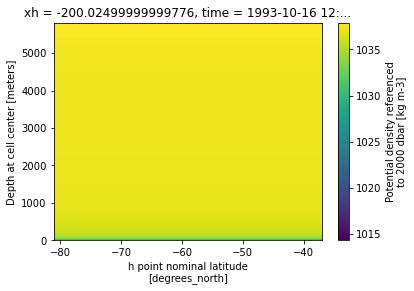

In [60]:
temprhonew.plot()

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

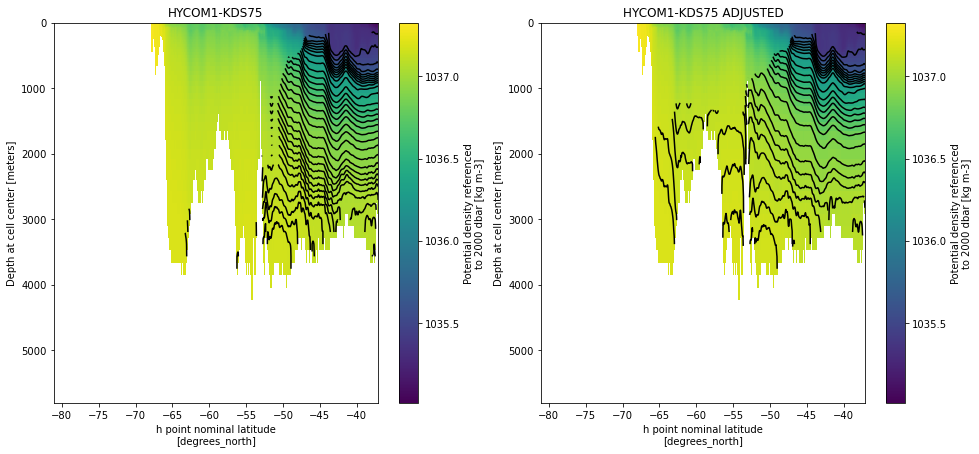

In [61]:
rhoslice = rhopot2.sel(xh=-280,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')
plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

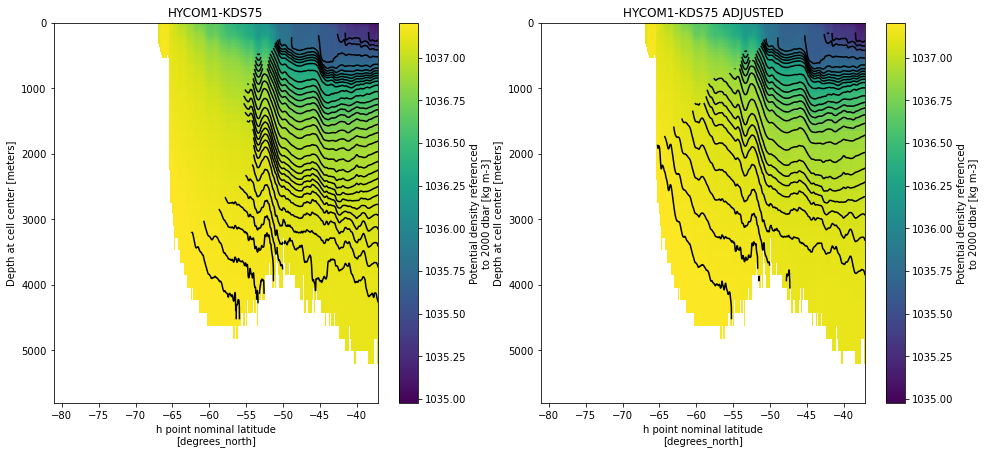

In [40]:
rhoslice = rhopot2.sel(xh=-240,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')
plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

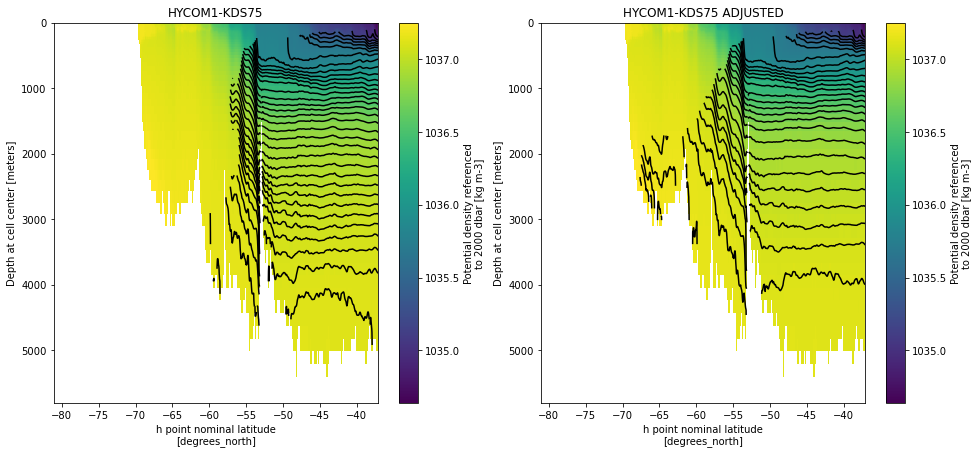

In [41]:
rhoslice = rhopot2.sel(xh=-200,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

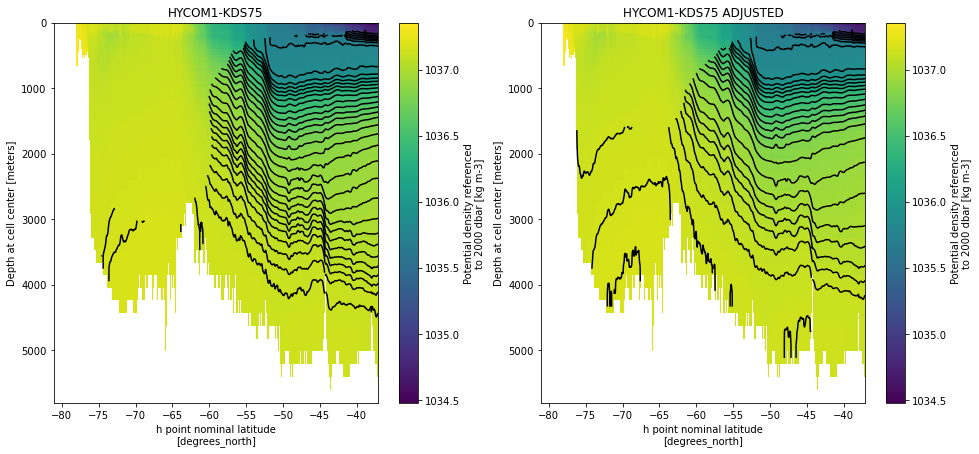

In [42]:
rhoslice = rhopot2.sel(xh=-160,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

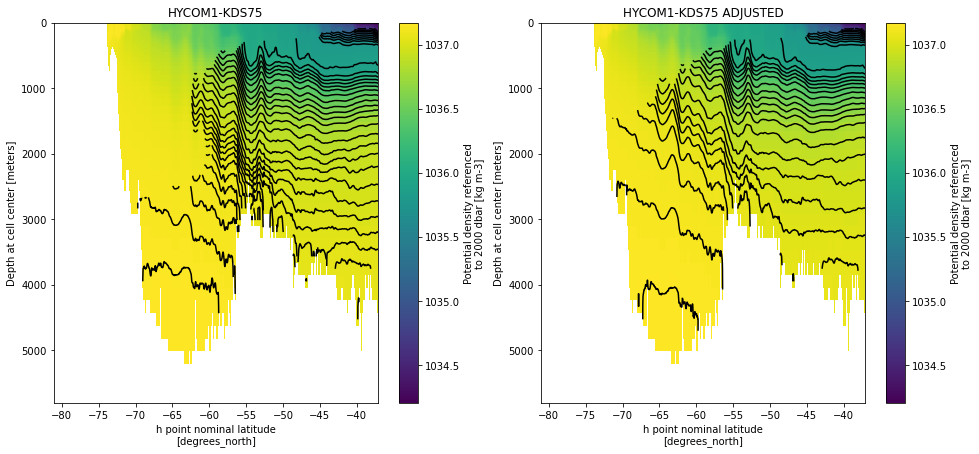

In [43]:
rhoslice = rhopot2.sel(xh=-120,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

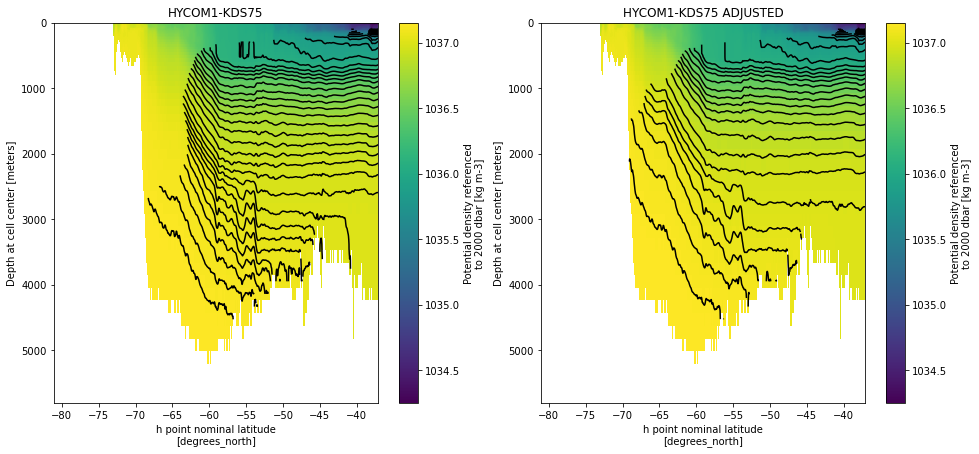

In [44]:
rhoslice = rhopot2.sel(xh=-80,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

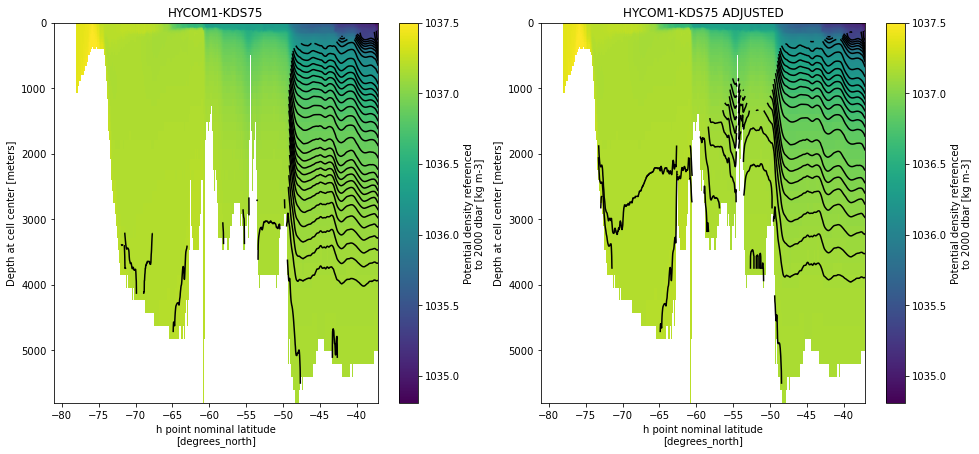

In [45]:
rhoslice = rhopot2.sel(xh=-40,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

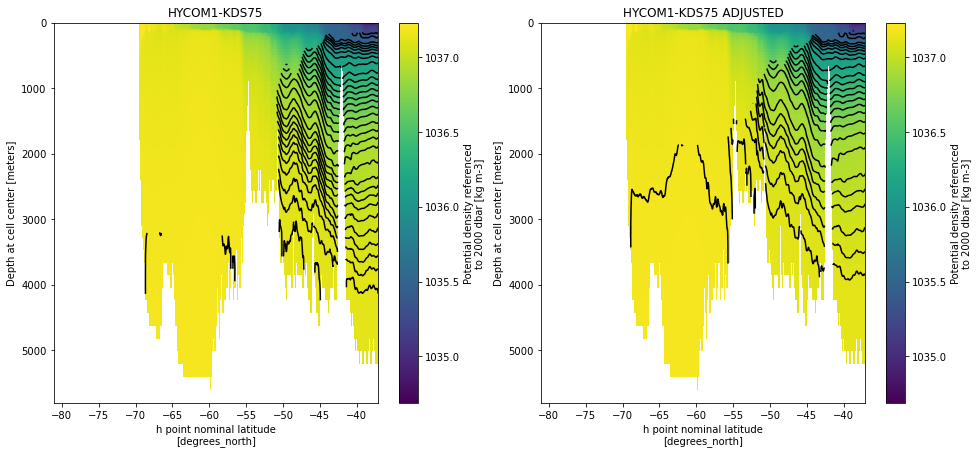

In [46]:
rhoslice = rhopot2.sel(xh=0,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

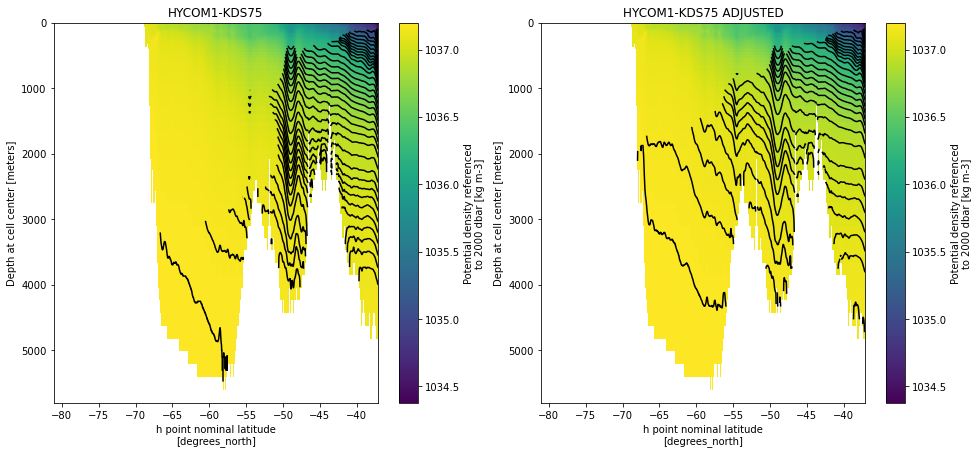

In [47]:
rhoslice = rhopot2.sel(xh=40,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')

Text(0.5, 1.0, 'HYCOM1-KDS75 ADJUSTED')

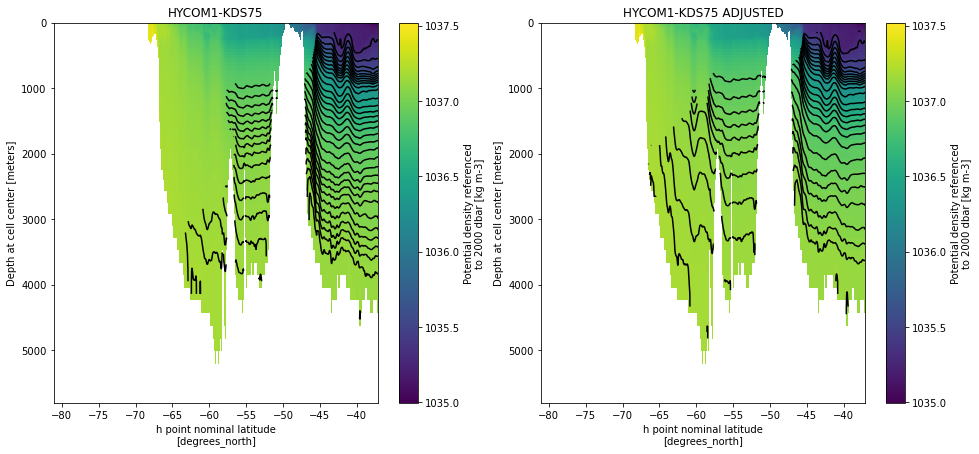

In [48]:
rhoslice = rhopot2.sel(xh=70,method='nearest')
temp = rhoslice.where(rhoslice<temprho,np.NaN).load()
temp_new = rhoslice.where(rhoslice<temprhonew,np.NaN).load()

plt.figure(figsize=(16,7))
plt.subplot(121)
rhoslice.plot()
temp.plot.contour(colors='k',levels=rholevels)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75')

plt.subplot(122)
rhoslice.plot()
temp_new.plot.contour(colors='k',levels=rhonew)
plt.gca().invert_yaxis()
plt.title('HYCOM1-KDS75 ADJUSTED')